### Task1 --> Clustering 

In [1]:
## Importing the necessary packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
print("success")

success


In [2]:
data = pd.read_excel(r'C:\Users\adity\Desktop\Techzion.xls')
df_data=data
print("File imported")

File imported


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df_data.shape

(9994, 21)

In [7]:
df_data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


#### Creating new coulum from Ship date and Order date

In [9]:
df_data['ship time']=df_data['Ship Date']-df_data['Order Date']
df_data["ship_time_float"]= df_data["ship time"].astype('timedelta64[h]')

#### Renaming some columns and Re-organising some Columns 

In [11]:
df_data.rename(columns={"Product ID":"ProductID", "Customer ID":"CustomerID","Order ID":"OrderID"},inplace = True)
df_data['OrderID'] = df_data['OrderID'].str.replace('-', '')
df_data['ProductID'] = df_data['ProductID'].str.replace('-', '')
df_data['CustomerID'] = df_data['CustomerID'].str.replace('-', '')

In [12]:
df_data.head(2)

,Row ID,OrderID,Order Date,Ship Date,Ship Mode,CustomerID,Customer Name,Segment,Country,City,...,ProductID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,ship time,ship_time_float
0,1,CA2016152156,2016-11-08,2016-11-11,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,FURBO10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3 days,72.0
1,2,CA2016152156,2016-11-08,2016-11-11,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,FURCH10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3 days,72.0


### For clustering we are following two methods. 
#### Method One:- First method is grouping customers by Recency, Frequency and Monetary and then clustering the customers
#### Method Two:- Second method we are taking the Category and Sales and then checking the Clustering

### Method One:- 
### We are going to analysis of the Customers based on below 3 factors:
#### R (Recency): Number of days since last purchase
#### F (Frequency): Number of tracsactions
#### M (Monetary): Total amount of sales ( revenue contributed)

In [15]:
# New Attribute : Monetary/ Sales 
rfm_m = df_data.groupby('CustomerID')['Sales'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Sales
0,AA10315,5563.560
1,AA10375,1056.390
2,AA10480,1790.512
3,AA10645,5086.935
4,AB10015,886.156


In [16]:
# New Attribute : Frequency

rfm_f = df_data.groupby('CustomerID')['OrderID'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,AA10315,11
1,AA10375,15
2,AA10480,12
3,AA10645,18
4,AB10015,6


In [17]:
### Merging the two data frames created by frequency and monetary/sales
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head(2)

,CustomerID,Sales,Frequency
0,AA10315,5563.56,11
1,AA10375,1056.39,15


In [18]:
# New Attribute : Recency
max_date = max(df_data['Order Date'])
df_data['Diff'] = max_date - df_data['Order Date']
df_data.head(2)

,Row ID,OrderID,Order Date,Ship Date,Ship Mode,CustomerID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,ship time,ship_time_float,Diff
0,1,CA2016152156,2016-11-08,2016-11-11,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3 days,72.0,417 days
1,2,CA2016152156,2016-11-08,2016-11-11,Second Class,CG12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3 days,72.0,417 days


In [19]:
# Compute last transaction date to get the recency of customers

rfm_p = df_data.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,AA10315,184 days
1,AA10375,19 days
2,AA10480,259 days
3,AA10645,55 days
4,AB10015,415 days


In [20]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,AA10315,184
1,AA10375,19
2,AA10480,259
3,AA10645,55
4,AB10015,415


### Merging the data Frame with the Previous merged data frame . We get Sales , frequency and Diff Together 

In [22]:
rfm = pd.merge(rfm, rfm_p)

In [23]:
rfm.head()

,CustomerID,Sales,Frequency,Diff
0,AA10315,5563.560,11,184
1,AA10375,1056.390,15,19
2,AA10480,1790.512,12,259
3,AA10645,5086.935,18,55
4,AB10015,886.156,6,415


In [24]:
rfm_df = rfm[['Sales', 'Frequency', 'Diff']]
rfm_df1 =rfm[['CustomerID','Sales', 'Frequency', 'Diff']]
rfm_df.info()
rfm_df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sales      793 non-null    float64
 1   Frequency  793 non-null    int64  
 2   Diff       793 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 24.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  793 non-null    object 
 1   Sales       793 non-null    float64
 2   Frequency   793 non-null    int64  
 3   Diff        793 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 31.0+ KB


In [25]:
rfm_df= rfm_df.rename(columns={'Diff':'Recency'})
rfm_df1= rfm_df1.rename(columns={'Diff':'Recency'})

In [26]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sales      793 non-null    float64
 1   Frequency  793 non-null    int64  
 2   Recency    793 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 24.8 KB


In [27]:
rfm_df.head(2)

,Sales,Frequency,Recency
0,5563.56,11,184
1,1056.39,15,19


In [28]:
## Doing Scalar Transformation to the Sales, frequency and Recency 
# Instantiate
scaler = StandardScaler()

# fit_transform
scaled_data_df = scaler.fit_transform(rfm_df)
print("done")

done


In [29]:
scaled_data_df

array([[ 1.01511197, -0.25691161,  0.19988856],
       [-0.70059002,  0.38425569, -0.68676201],
       [-0.4211387 , -0.09661979,  0.60291154],
       ...,
       [ 1.45549211, -0.09661979, -0.74049841],
       [ 1.9523543 ,  2.9489249 , -0.49868462],
       [-0.53403045, -0.57749527,  0.29661407]])

In [30]:
#Define the cluster numbers range
cluster_range = range( 1, 10 )

#Error obtained after each iteration of clustering algo
cluster_errors = []

#Apply KMeans cluseting for each k value mentioned in cluster_range
for num_clusters in cluster_range:
 clusters = KMeans( num_clusters )
 clusters.fit( scaled_data_df )
 cluster_errors.append( clusters.inertia_ )

In [31]:
cluster_errors

[2378.9999999999986,
 1562.8701568704887,
 1070.1785300250356,
 830.7142347492172,
 710.5630482570635,
 617.8304710690129,
 544.7412407453043,
 492.9627833811921,
 452.7968185949209]

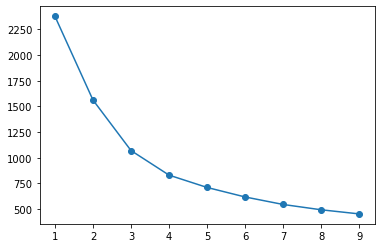

In [32]:
## Using Elbow method to find the optimal number of clusters 
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

In [33]:
## taking three clusters , we apply the  K means algorith to create the clusters 
from sklearn.cluster import KMeans
clusters = KMeans(3, random_state=42 )
clusters.fit( scaled_data_df )
## Adding back the clusters created to the rfm_df1 data frame
rfm_df1["clusterid"]=clusters.labels_

In [34]:
rfm_df1['clusterid'].value_counts()

2    455
1    227
0    111
Name: clusterid, dtype: int64

In [35]:
rfm_df1.head(2)

,CustomerID,Sales,Frequency,Recency,clusterid
0,AA10315,5563.56,11,184,2
1,AA10375,1056.39,15,19,2


In [36]:
### Finding the Cluster centeroids 

In [37]:
clusters.cluster_centers_ 

array([[-0.48938409, -0.77388885,  2.07219053],
       [ 1.01694268,  1.14245021, -0.36703044],
       [-0.38488467, -0.37783352, -0.32250936]])

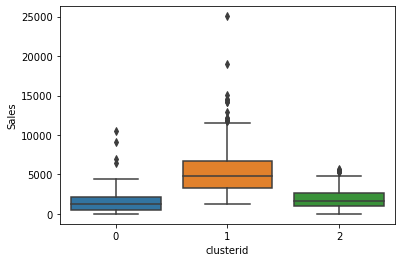

In [38]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='clusterid', y='Sales', data=rfm_df1)

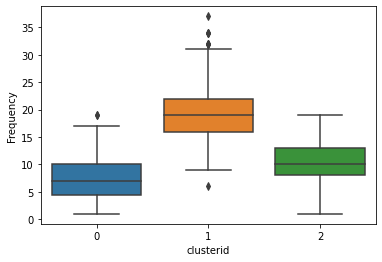

In [39]:
# Box plot to visualize Cluster Id vs frequency

sns.boxplot(x='clusterid', y='Frequency', data=rfm_df1)

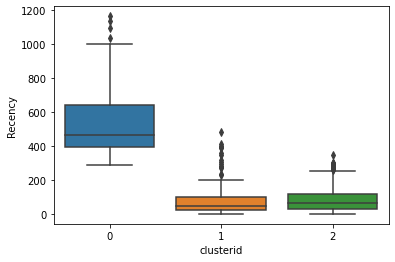

In [40]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='clusterid', y='Recency', data=rfm_df1)

In [41]:
rfm_df1.groupby( 'clusterid' )["Sales", "Frequency",'Recency'].agg( ["mean",'std'] ).reset_index() 

<ipython-input-41-0d94585aa21f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfm_df1.groupby( 'clusterid' )["Sales", "Frequency",'Recency'].agg( ["mean",'std'] ).reset_index()


clusterid        Sales               Frequency               Recency  \
                    mean          std       mean       std        mean   
0         0  1611.230547  1678.367781   7.774775  4.201049  532.423423   
1         1  5562.164007  3167.598637  19.704846  5.280296   78.312775   
2         2  1880.753934  1177.393529  10.237363  3.646966   86.896703   

               
          std  
0  192.844759  
1   86.562750  
2   73.823133

Conclusion from clustering based on frequency, recency and total sales:

Customer with Cluster ID # 0 (Low-Sales Customers): 
   - Do not visit the store frequently  
   - Have less sales when compared to other clusters 
   - Have not been to the store recently 

Customer with Cluster ID # 1(High-Sales Customers):
   - Visits the store frequently  
   - Have high sales when compared to other clusters 
   - Have been to the store recently 

Customer with Cluster ID # 2(Medium-Sales Customers):
   - Visits the store frequently  
   - Have less sales when compared to other cluster 1 
   - Have been to the store recently 

#### Using Method 2 :- Taking the Category and Sales and then checking the Clusters created ( note these two clusters have been taken based on trail and error) 

In [43]:
df_trial_two= df_data[["Category","Sales"]]
df_trial_two.head(2)

,Category,Sales
0,Furniture,261.96
1,Furniture,731.94


In [44]:
dummy_variable_Segment = pd.get_dummies(df_trial_two["Category"])
df_trial_two_new = pd.concat([df_trial_two, dummy_variable_Segment], axis=1)
df_trial_two_new.drop('Category',axis=1,inplace=True)
df_trial_two_new.head(2)

,Sales,Furniture,Office Supplies,Technology
0,261.96,1,0,0
1,731.94,1,0,0


In [45]:
## Doing Scalar Transformation to the Sales, frequency and Recency 
# Instantiate
scaler = StandardScaler()

# fit_transform
scaled_data2_df = scaler.fit_transform(df_trial_two_new)
print("done")

done


In [46]:
#Define the cluster numbers range
cluster_range = range( 1, 10 )

#Error obtained after each iteration of clustering algo
cluster_errors = []

#Apply KMeans cluseting for each k value mentioned in cluster_range
for num_clusters in cluster_range:
 clusters = KMeans( num_clusters )
 clusters.fit( scaled_data2_df )
 cluster_errors.append( clusters.inertia_ )

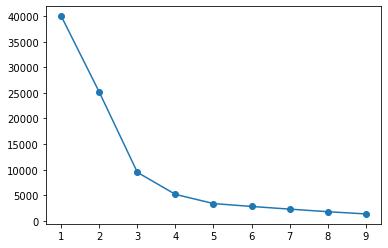

In [47]:
## Using Elbow method to find the optimal number of clusters 
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

We are choosing the number of optimal clusters as 3

In [48]:
from sklearn.cluster import KMeans
clusters = KMeans(3, random_state=42 )
clusters.fit( scaled_data2_df )
df_trial_two['clusterid'] = clusters.labels_

<ipython-input-48-d67b45a18c56>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trial_two['clusterid'] = clusters.labels_


In [49]:
df_trial_two['clusterid'].value_counts()

0    6022
1    2121
2    1851
Name: clusterid, dtype: int64

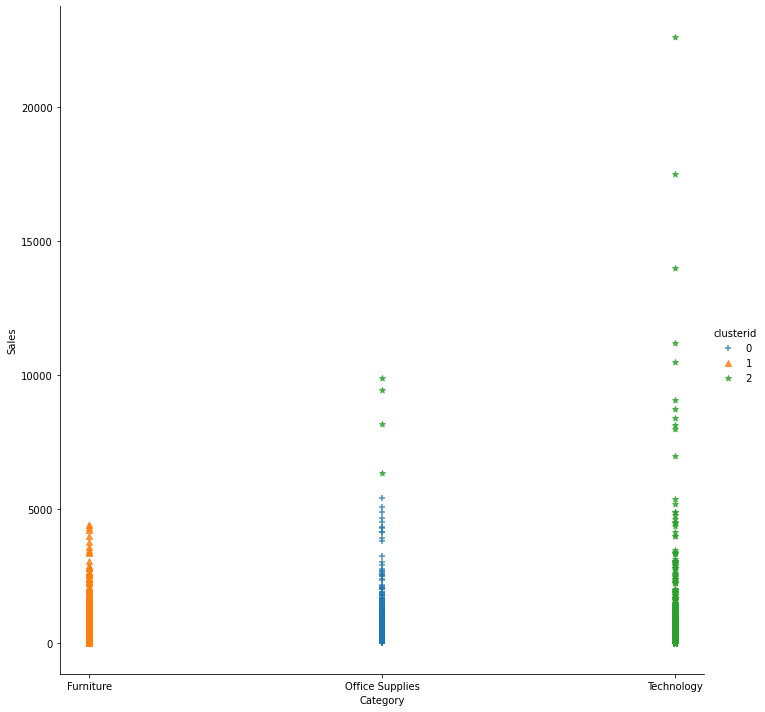

In [50]:
# markers to be used for three different clusters data points
data_markers = ['+','^','*']
g=sns.lmplot( y="Sales", x='Category',
            data= df_trial_two,
            hue = "clusterid",
            fit_reg=False,
            markers = data_markers,
            height = 10);

Conclusion from clustering based on purchase history on specific segments: 
- Cluster # 0 (Furniture Customers): If a customer has a history of purchasing Furniture; we could promote sales of new furniture products 
- Cluster # 1 (Office Supplies Customers): If a customer has a history of purchasing medium amounts of office products; we could promote the sale of further office items 
- Cluster # 2 (Technology Customers): If a customer has a history of purchasing high amounts of office products (Cluster 2 is in the high end of the office supplies category); we could promote the sale of technology items as well 
- Second conclusion for Cluster # 2 :  If a customer has a history of purchasing Technology products; we could promote sales of new Technology products 

Conclusion from Method 1 and Method 2 : 

Targetting with coupons with small amount of discount ( The reason we are giving only a small amount of discount is because they are already loyal customers to the shop) 

 > We could find an intersection of customers from High Sales Customers ( from Method 1) and Technology Customers (from Method 2). So we will be having a high spending customer with high spending in Technology. 

 > We could find an intersection of customers from High Sales Customers ( from Method 1) and Office Supplies Customers (from Method 2). So we will be having a high spending customer with high spending in Office Supplies. 

 > We could find an intersection of customers from High Sales Customers ( from Method 1) and Furniture Customers (from Method 2). So we will be having a high spending customer with high spending in Furniture Supplies. 

Targetting with coupons with high amount of discount (To attract prospective buyers by converting medium spending customers into high spending customers) 

 > We could find an intersection of customers from Medium Sales Customers ( from Method 1) and Technology Customers (from Method 2). So we will be having a Medium spending customer with medium spending in Technology. 

 > We could find an intersection of customers from Medium Sales Customers ( from Method 1) and Office Supplies Customers (from Method 2). So we will be having a Medium spending customer with medium spending in Office Supplies. 

 > We could find an intersection of customers from Medium Sales Customers ( from Method 1) and Furniture Customers (from Method 2). So we will be having a Medium spending customer with medium spending in Furniture Supplies. 


# Task 2

In [51]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [52]:
see = df_data.groupby('OrderID')['Quantity'].count()

In [53]:
see

OrderID
CA2014100006    1
CA2014100090    2
CA2014100293    1
CA2014100328    1
CA2014100363    2
               ..
US2017168802    1
US2017169320    2
US2017169488    2
US2017169502    2
US2017169551    6
Name: Quantity, Length: 5009, dtype: int64

In [54]:
basket = (df_data
          .groupby(['OrderID','ProductID' ])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('OrderID'))

In [55]:
basket.head(20)

#basket.to_csv(r'.csv', index = False)

ProductID,FURBO10000112,FURBO10000330,FURBO10000362,FURBO10000468,FURBO10000711,FURBO10000780,FURBO10001337,FURBO10001519,FURBO10001567,FURBO10001601,...,TECPH10004833,TECPH10004875,TECPH10004896,TECPH10004897,TECPH10004908,TECPH10004912,TECPH10004922,TECPH10004924,TECPH10004959,TECPH10004977
OrderID,,,,,,,,,,,,,,,,,,,,,
CA2014100006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2014100090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2014100293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2014100328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2014100363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2014100391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2014100678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2014100706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA2014100762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#Function to encode the given value to zero and ones
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [57]:
#Apply the encoding function on the basket dataframe
basket_encoded = basket.applymap(encode_units)
basket_sets = basket_encoded
basket_sets.head()

ProductID,FURBO10000112,FURBO10000330,FURBO10000362,FURBO10000468,FURBO10000711,FURBO10000780,FURBO10001337,FURBO10001519,FURBO10001567,FURBO10001601,...,TECPH10004833,TECPH10004875,TECPH10004896,TECPH10004897,TECPH10004908,TECPH10004912,TECPH10004922,TECPH10004924,TECPH10004959,TECPH10004977
OrderID,,,,,,,,,,,,,,,,,,,,,
CA2014100006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2014100090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2014100293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2014100328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA2014100363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
basket_sets.shape

(5009, 1862)

In [64]:
from mlxtend.frequent_patterns import apriori,association_rules

Shortlisting the association rules with a support of .2%

In [65]:
frequent_itemsets = apriori(basket_sets, min_support=0.002, use_colnames=True)

In [66]:
frequent_itemsets

,support,itemsets
0,0.002396,(FURCH10000454)
1,0.002196,(FURCH10000785)
2,0.002995,(FURCH10001146)
3,0.002196,(FURCH10002602)
4,0.002995,(FURCH10002647)
...,...,...
70,0.002595,(TECAC10003038)
71,0.002995,(TECAC10003628)
72,0.003594,(TECAC10003832)
73,0.002396,(TECAC10004510)


In [67]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [68]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [69]:
print('Top 10 rules sorted by lift ')
rules.sort_values(by='lift',ascending=False).head(10)

Top 10 rules sorted by lift 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


# Conclusion based on usage of apriori algorithm: 

There are no purchases which are occurring for a support of 2 %. 
But there are some purchases happening with a support of .2 %. Those items are displayed in the above. 

Drawbacks of the apriori algorithm: 
  1.   At each step, candidate sets have to be built.
  2.   To build the candidate sets, the algorithm has to repeatedly scan the database.
    

# # Since we are not getting any output using apriori; so we are using the fpgrowth algorithm ( Frequency Pattern Growth Algorithm). It overcomes the drawbacks of apriori. 

In [70]:
from mlxtend.frequent_patterns import fpgrowth

We are using a support of .02 % 

In [72]:
frequent_itemsets_fp = fpgrowth(basket_sets, min_support=0.0002, use_colnames=True)

In [73]:
frequent_itemsets_fp

,support,itemsets
0,0.002396,(OFFBI10001597)
1,0.000799,(FURTA10003715)
2,0.001597,(OFFPA10000176)
3,0.002396,(OFFBI10000343)
4,0.001397,(OFFFA10000611)
...,...,...
1804,0.000399,"(OFFPA10004039, OFFPA10001776)"
1805,0.000399,"(FURCH10003846, OFFBI10000320)"
1806,0.000399,"(OFFAR10000914, TECAC10000057)"
1807,0.000399,"(OFFPA10002195, OFFAP10000938)"


Shortlisting

In [80]:
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=200)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(OFFBI10002160),(OFFAR10004999),0.001397,0.001198,0.000399,0.285714,238.523810,0.000398,1.398323
1,(OFFAR10004999),(OFFBI10002160),0.001198,0.001397,0.000399,0.333333,238.523810,0.000398,1.497904
2,(OFFFA10002780),(TECPH10000702),0.000998,0.000998,0.000399,0.400000,400.720000,0.000398,1.665003
3,(TECPH10000702),(OFFFA10002780),0.000998,0.000998,0.000399,0.400000,400.720000,0.000398,1.665003
4,(OFFFA10002780),(TECPH10002293),0.000998,0.001198,0.000399,0.400000,333.933333,0.000398,1.664670
5,(TECPH10002293),(OFFFA10002780),0.001198,0.000998,0.000399,0.333333,333.933333,0.000398,1.498503
6,(OFFLA10004544),(OFFAR10001919),0.001397,0.001397,0.000399,0.285714,204.448980,0.000397,1.398044
7,(OFFAR10001919),(OFFLA10004544),0.001397,0.001397,0.000399,0.285714,204.448980,0.000397,1.398044
8,(OFFSU10000432),(OFFAR10003183),0.000799,0.001597,0.000399,0.500000,313.062500,0.000398,1.996806
9,(OFFAR10003183),(OFFSU10000432),0.001597,0.000799,0.000399,0.250000,313.062500,0.000398,1.332269


In [81]:
print('Top 10 rules sorted by lift ')
rules_fp.sort_values(by='lift',ascending=False).head(10)

Top 10 rules sorted by lift 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,(TECAC10000057),(OFFAR10000914),0.000998,0.000799,0.000399,0.400000,500.900000,0.000398,1.665336
34,(OFFAR10000914),(TECAC10000057),0.000799,0.000998,0.000399,0.500000,500.900000,0.000398,1.998004
14,(TECPH10003187),(FURTA10003569),0.000799,0.001198,0.000399,0.500000,417.416667,0.000398,1.997604
15,(FURTA10003569),(TECPH10003187),0.001198,0.000799,0.000399,0.333333,417.416667,0.000398,1.498802
2,(OFFFA10002780),(TECPH10000702),0.000998,0.000998,0.000399,0.400000,400.720000,0.000398,1.665003
3,(TECPH10000702),(OFFFA10002780),0.000998,0.000998,0.000399,0.400000,400.720000,0.000398,1.665003
4,(OFFFA10002780),(TECPH10002293),0.000998,0.001198,0.000399,0.400000,333.933333,0.000398,1.664670
5,(TECPH10002293),(OFFFA10002780),0.001198,0.000998,0.000399,0.333333,333.933333,0.000398,1.498503
9,(OFFAR10003183),(OFFSU10000432),0.001597,0.000799,0.000399,0.250000,313.062500,0.000398,1.332269
8,(OFFSU10000432),(OFFAR10003183),0.000799,0.001597,0.000399,0.500000,313.062500,0.000398,1.996806


In [83]:
print('Top 10 rules sorted by confidence ')
rules_fp.sort_values(by='confidence',ascending=False).head(10)

Top 10 rules sorted by confidence 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(FURFU10003464),(TECPH10002496),0.000799,0.001797,0.000399,0.5,278.277778,0.000398,1.996406
8,(OFFSU10000432),(OFFAR10003183),0.000799,0.001597,0.000399,0.5,313.062500,0.000398,1.996806
34,(OFFAR10000914),(TECAC10000057),0.000799,0.000998,0.000399,0.5,500.900000,0.000398,1.998004
32,(FURCH10003846),(OFFBI10000320),0.000799,0.001996,0.000399,0.5,250.450000,0.000398,1.996007
20,(FURTA10002645),(TECAC10003033),0.000799,0.001996,0.000399,0.5,250.450000,0.000398,1.996007
14,(TECPH10003187),(FURTA10003569),0.000799,0.001198,0.000399,0.5,417.416667,0.000398,1.997604
37,(OFFAP10000938),(OFFPA10002195),0.000799,0.002396,0.000399,0.5,208.708333,0.000397,1.995209
35,(TECAC10000057),(OFFAR10000914),0.000998,0.000799,0.000399,0.4,500.900000,0.000398,1.665336
2,(OFFFA10002780),(TECPH10000702),0.000998,0.000998,0.000399,0.4,400.720000,0.000398,1.665003
12,(TECPH10003885),(FURCH10003379),0.000998,0.001797,0.000399,0.4,222.622222,0.000397,1.663672


Task 2 & Task 3 - Conclusion: 

- The top 10 association rules by lift are provided above: 
           1. TECAC10000057 Microsoft Natural Ergonomic Keyboard 4000	-> 
                        OFFAR10000914 Boston Mini Stand Up Battery Pencil Sharpener
           2. OFFAR10000914 Boston Mini Stand Up Battery Pencil Sharpener ->
                        TECAC10000057 Microsoft Natural Ergonomic Keyboard 4000
           3. TECPH10003187 Anker Astro Mini 3000mAh Ultra-Compact Portable Charger ->
                        FURTA10003569 Bretford CR8500 Series Meeting Room Furniture
           4. FURTA10003569 Bretford CR8500 Series Meeting Room Furniture ->
                        TECPH10003187	Anker Astro Mini 3000mAh Ultra-Compact Portable Charger
           5. OFFFA10002780 Staples ->
                        TECPH10000702   Square Credit Card Reader, 4 1/2" x 4 1/2" x 1", White
           6. TECPH10000702 Square Credit Card Reader, 4 1/2" x 4 1/2" x 1", White ->
                        OFFFA10002780   Staples
           7. OFFFA10002780	Staples -> 
                        TECPH10002293	Anker 36W 4-Port USB Wall Charger Travel Power Adapter for iPhone 5s 5c 5
           8. TECPH10002293 Anker 36W 4-Port USB Wall Charger Travel Power Adapter for iPhone 5s 5c 5 -> 
                        OFFFA10002780    Staples
           9. OFFAR10003183 Avery Fluorescent Highlighter Four-Color Set ->
                        OFFSU10000432  Acco Side-Punched Conventional Columnar Pads
           10. OFFSU10000432 Acco Side-Punched Conventional Columnar Pads -> 
                        OFFAR10003183 Avery Fluorescent Highlighter Four-Color Set
                        
   The top 10 association rules by confidence are provided above: 
           0.(FURFU10003464) Seth Thomas 8 1/2" Cubicle Clock -> 
                        (TECPH10002496) Cisco SPA301
           1.(OFFSU10000432) Acco Side-Punched Conventional Columnar Pads ->
                        (OFFAR10003183) Avery Fluorescent Highlighter Four-Color Set
           2.(OFFAR10000914) Boston 16765 Mini Stand Up Battery Pencil Sharpener ->
                        (TECAC10000057) Microsoft Natural Ergonomic Keyboard 4000
           3.(FURCH10003846) Hon Valutask Swivel Chairs ->
                        (OFFBI10000320) GBC Plastic Binding Combs
           4.(FURTA10002645) Hon Rectangular Conference Tables ->
                        (TECAC10003033) Plantronics CS510 - Over-the-Head monaural Wireless Headset System
           5.(TECPH10003187) Anker Astro Mini 3000mAh Ultra-Compact Portable Charger ->
                        (FURTA10003569) Bretford CR8500 Series Meeting Room Furniture
           6.(OFFAP10000938) Avanti 1.7 Cu. Ft. Refrigerator ->
                        (OFFPA10002195) Xerox 1966
           7.(TECAC10000057) Microsoft Natural Ergonomic Keyboard 4000 -> 
                        (OFFAR10000914) Boston 16765 Mini Stand Up Battery Pencil Sharpener
           8.(OFFFA10002780) Fasteners -> 
                        (TECPH10000702) Square Credit Card Reader, 4 1/2" x 4 1/2" x 1", White
           9.(TECPH10003885) Cisco SPA508G -> 
                        (FURCH10003379) Global Commerce Series High-Back Swivel/Tilt Chairs


Task 4: 

Clusters from Method 1: 
 > High spending customers -> If the high spending customer buys any of the antecendent items from the top 10 rules by lift or confidence we would provide recommendation of the consequent item. We will provide small discount coupons for buying consequent items. 
 
 > Medium spending customers -> If the high spending customer buys any of the antecendent items from the top 10 rules by lift or confidence we would provide recommendation of the consequent item. We will provide high discount coupons for buying consequent items 
 
 > Low spending customers   -> We will not be able to provide any recommendations 
 
Clusters from Method 2: 
> Furniture Customer -> If the high spending customer buys any of the antecendent items from the top 10 rules by lift or confidence we would provide recommendation of the consequent item.

 For e.g. if the customer buys  Hon Rectangular Conference Tables then we can provide recommendation of Plantronics CS510 - Over-the-Head monaural Wireless Headset System. Another example is if the customer buys Bretford CR8500 Series Meeting Room Furniture then we can provide recommendation of Anker Astro Mini 3000mAh Ultra-Compact Portable Charger

> Technology customer -> If the high spending customer buys any of the antecendent items from the top 10 rules by lift or confidence we would provide recommendation of the consequent item. 

> Office Supplies customer -> If the high spending customer buys any of the antecendent items from the top 10 rules by lift or confidence we would provide recommendation of the consequent item